In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
birthDF=pd.read_csv('data/births.txt', header=None,index_col=0) # 판다스에서 첫번째줄을 컬럼으로 빼주기 
birthDF.columns=['남아수','여아수']
birthDF.index.name='년도'
birthDF      

,남아수,여아수
년도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [8]:
# 1. 남아 ,여아 출생 평균을 구하시요
print( birthDF.mean().round(2) )
print( birthDF['남아수'].mean() )
print( birthDF['여아수'].mean() )

남아수    1225776.07
여아수    1245399.21
dtype: float64
1225776.0681818181
1245399.2121212122


In [3]:
# 2. 2000년대 이후데이터를 구하시요(데이터프레임결과(zip해서print출력아님))
# 년도   남아   여아
# ==============
# 2000     xx     xx

# birthDF[birthDF.index>=2000]
birthDF.loc[2000:]

,남아수,여아수
년도,,
2000,1814601,1962406
2001,1799049,1941251
2002,1795206,1939815
2003,1825359,1973434
2004,1834145,1982794
2005,1845379,1994841
2006,1898463,2052377
2007,1919408,2072139
2008,1887234,2036289


In [26]:
# 3. 남아출생이 가장많은 년도와 남아수를 구하시요.

# birthDF['남아수'].nlargest(n=1)
mx = birthDF['남아수'].max()
# birthDF[ birthDF['남아수']==mx ]
birthDF.query( f'남아수=={mx}' )[ ['남아수'] ]

,남아수
년도,
1957,2044160


In [6]:
birthDF.nlargest(n=1,columns='남아수',keep='all')[ ['남아수'] ]

,남아수
년도,
1957,2044160


In [28]:
# 4. 남아출생이 가장많은 top5
# 를 구하시요(년도와 남아수)
birthDF.nlargest(n=5, columns='남아수')[['남아수']]

,남아수
년도,
1957,2044160
1959,2023044
1960,2022093
1961,2017316
1958,2010884


In [ ]:
# 5. 남아율(%) 을 구하고 각년도별
# 남아수가 차지하는비율을 데이터로
# 보여주시요.(데이터프레임결과)
# 년도  남아    여아    남아율
# ===================
# ..

In [31]:
birthDF['남아수']

년도
1880      90993
1881      91954
1882     107850
1883     112321
1884     129022
         ...   
2007    1919408
2008    1887234
2009    1832925
2010    1772738
2011    1753500
Name: 남아수, Length: 132, dtype: int64

In [30]:
birthDF.sum(axis=1)

년도
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2007    3991547
2008    3923523
2009    3812228
2010    3686589
2011    3646730
Length: 132, dtype: int64

In [32]:
birthDF['남아수']/birthDF.sum(axis=1)*100

년도
1880    45.161402
1881    47.718981
1882    48.682393
1883    51.772759
1884    52.993630
          ...    
2007    48.086819
2008    48.100495
2009    48.080152
2010    48.086131
2011    48.084174
Length: 132, dtype: float64

In [8]:
pd.set_option('display.max_rows',None )

In [9]:
# birthDF['남아율']=(birthDF['남아수']/(birthDF['남아수']+birthDF['여아수']))*100
birthDF['남아율']= birthDF['남아수']/birthDF.sum(axis=1)*100
birthDF

,남아수,여아수,남아율
년도,,,
1880,90993,110491,45.161402
1881,91954,100745,47.718981
1882,107850,113688,48.682393
1883,112321,104629,51.772759
1884,129022,114445,52.993630
1885,133055,107800,55.242781
1886,144535,110784,56.609575
1887,145982,101414,59.007421
1888,178627,120853,59.645719


In [ ]:
# 6. 2000년도 이후데이터 에 대해
# 출생량 을 구하고
# 남아수가 1800000 이상이면 '많음'아니면 '적음'
# 이라고 보여 주시요(데이터프레임결과)
# 년도    남아수 출생량
# 2000   1233   '많음'
# 2001   1234   '적음'

In [10]:
b2000 = birthDF.loc[2000:][['남아수']]
b2000['출생량']= b2000['남아수'].apply( lambda v: '많음' if v>=1800000 else '적음')
b2000

,남아수,출생량
년도,,
2000,1814601,많음
2001,1799049,적음
2002,1795206,적음
2003,1825359,많음
2004,1834145,많음
2005,1845379,많음
2006,1898463,많음
2007,1919408,많음
2008,1887234,많음


In [ ]:
# 7. 1800년대,1900년대,2000년대 
# 각 남아,여야수 평균을 구하시요

In [11]:
birthDF.drop( columns='남아율',inplace=True)

In [12]:
b1800 = birthDF.loc[1800:1899]
b1900 = birthDF.loc[1900:1999]
b2000 = birthDF.loc[2000:]

In [50]:
b1800.mean()

남아수    176714.15
여아수    111820.55
dtype: float64

In [51]:
b1900.mean()

남아수    1362901.51
여아수    1384145.55
dtype: float64

In [53]:
b2000.mean().round(2)

남아수    1831500.58
여아수    1978477.50
dtype: float64

In [13]:
resultDF = pd.DataFrame( [b1800.mean(),b1900.mean(),b2000.mean().round(2) ],
                       index=['1800년대','1900년대','2000년대'])
resultDF

,남아수,여아수
1800년대,176714.15,111820.55
1900년대,1362901.51,1384145.55
2000년대,1831500.58,1978477.50


In [14]:
resultDF.T

,1800년대,1900년대,2000년대
남아수,176714.15,1362901.51,1831500.58
여아수,111820.55,1384145.55,1978477.50


In [62]:
birthDF['여아수'].quantile(q=[0.25,0.75])

0.25     491904.0
0.75    1904686.5
Name: 여아수, dtype: float64

In [16]:
# 8. 여아 25%~75%사이의 값을 구하시요

# q25,q75=birthDF['여아수'].quantile(q=[0.25,0.75])
# birthDF[ (birthDF['여아수']>=q25) & (birthDF['여아수']<=q75)]

sr=birthDF['여아수'].quantile(q=[0.25,0.75])
# birthDF[ (birthDF['여아수']>=sr[0.25]) & (birthDF['여아수']<=sr[0.75] ) ]
birthDF.query( f'{sr[0.25]}<= 여아수 <= {sr[0.75]}' )

,남아수,여아수
년도,,
1913,624518,512557
1914,761548,654762
1915,983874,848603
1916,1044323,890099
1917,1081280,925511
1918,1157647,1013537
1919,1130145,980149
1920,1198283,1064463
1921,1232999,1101457


In [18]:
df = pd.DataFrame([[1,2],[3,4]] )
df

,0,1
0,1,2
1,3,4


In [19]:
a, b = df.values
print( a )
print( '============')
print( b )

[1 2]
[3 4]


In [25]:
print('1800년대 평균')
print('-'*20)
print(birthDF[(1800<=birthDF.index)&(birthDF.index<=1899)].mean())
print('-'*20)
print('1900년대 평균')
print('-'*20)
print(birthDF[(1900<=birthDF.index)&(birthDF.index<=1999)].mean())
print('-'*20)
print('2000년대 평균')
print('-'*20)
print(birthDF[2000>=birthDF.index].mean())


1800년대 평균
--------------------
남아수    176714.15
여아수    111820.55
dtype: float64
--------------------
1900년대 평균
--------------------
남아수    1362901.51
여아수    1384145.55
dtype: float64
--------------------
2000년대 평균
--------------------
남아수    1.170571e+06
여아수    1.178623e+06
dtype: float64


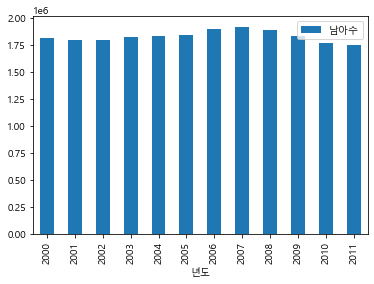

In [23]:
# 9. 2000년대 남아데이터를 바차트로 그리시요.
year=birthDF.loc[2000:]
year.plot(y=['남아수'],kind='bar') 
plt.show()

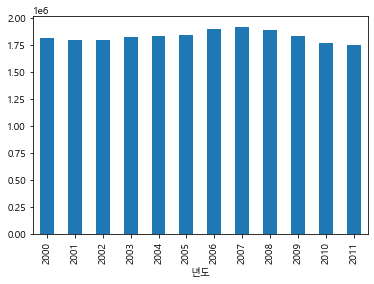

In [30]:
birthDF['남아수'][birthDF.index >=2000].plot(kind='bar')
plt.show()  

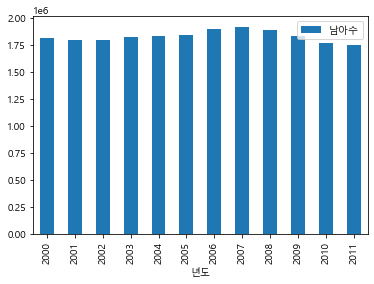

In [28]:
birthDF.loc[2000:].plot( y=['남아수'],kind='bar') 
plt.show()